Define the strata data

In [1]:
library('RcppAlgos')
library('ggplot2')
library('sampling')
population<-NULL
set.seed(5)

**Set up the data**

In [2]:
population<-data.frame(cluster=c(NULL),strata=c(NULL), y=c(NULL))
population_size<-1000000

strata<-c(1,2,3,4); # Define the strata IDs
strata_labels<-c('a','b','c','d'); # Define the strata labels
strata_proportions<-c(0.15,0.2,0.30,0.35); # Set the proportionality of the strata
strata_means<-c(105,110,115,120); # Set the strata means
strata_sd<-c(5,5,5,5); # Set the strata standard deviations

for (i in strata){
    # Set the current strata population size using the strata proportion and the overall population total
    Ni<-strata_proportions[i]*population_size
    
    Ui<-strata_means[i]; #Statum mean
    SDi<-strata_sd[i]; # Stratum standard deviation
    Sl<-strata_labels[i]; # Stratum label
    
    # Put each population unit into a random cluster for later cluster sampling
    cluster_indicator<-as.integer(runif(n = Ni, min = 0, max = max(strata)))+1; 
    
    # Generate Ni values of the stratum related variable using the stratum mean and sd
    stratum_values<-rnorm(n = Ni, mean = Ui, sd = SDi); 
    
    # Generate Ni values of the same stratum label so that the whole stratum is labed the with the same label
    stratum_label<-rep(Sl,Ni); 
    
    stratum_population<-data.frame(cluster=cluster_indicator,strata=stratum_label, y=stratum_values)
    population<-rbind(population,stratum_population)
}
population$c1<-population$cluster=='1'
population$c2<-population$cluster=='2'
population$c3<-population$cluster=='3'
population$c4<-population$cluster=='4'

population$sa<-population$strata=='a'
population$sb<-population$strata=='b'
population$sc<-population$strata=='c'
population$sd<-population$strata=='d'

In [3]:
# Population mean
y_bar<-mean(population$y);round(y_bar,2); 

[1] 114.24

In [4]:
# Population variance
y_VAR<-var(population$y);round(y_VAR,2); 

[1] 53.29

In [5]:
# Population stadard deviation
y_SD<-sqrt(y_VAR);round(y_SD,2)

[1] 7.3

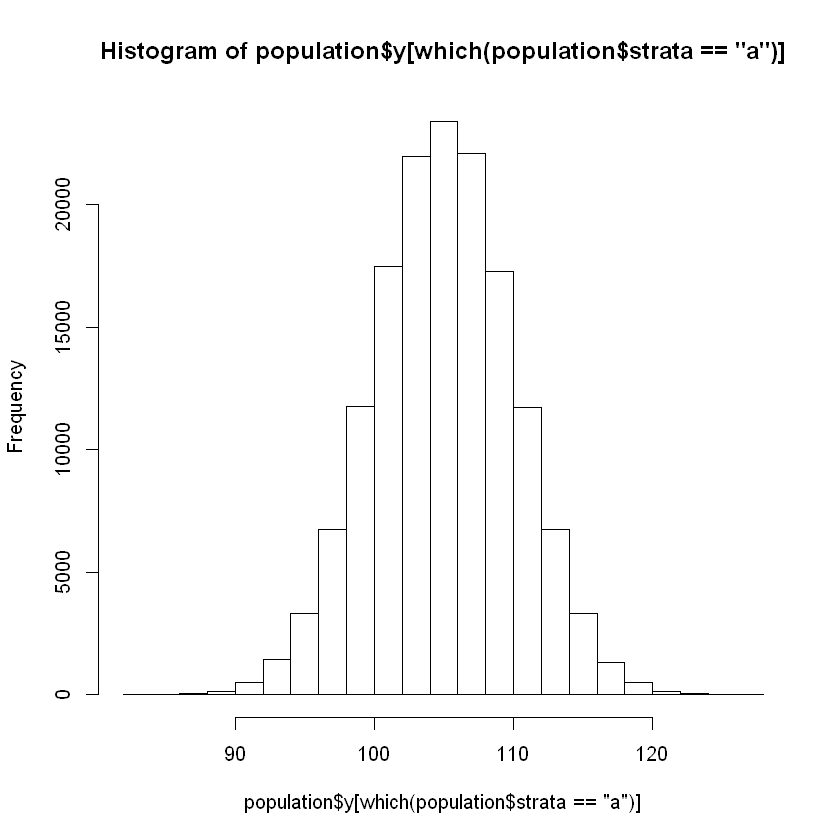

In [6]:
# Visually check the histogram of one of the strata
hist(population$y[which(population$strata=='a')])

In [7]:
# Check the clusters to make sure they are representative of the population
for (i in strata){
    cluster_ui<-mean(population$y[which(population$cluster==i)])
    cluster_sd<-sqrt(var(population$y[which(population$cluster==i)]))
    cluster_text<-paste("Cluster",i,"mean=",cluster_ui,"sd=",cluster_sd)
    print(cluster_text)
}
pop_mean_text<-paste("Polulation mean=",y_bar,"sd=",y_SD)
print(pop_mean_text)

[1] "Cluster 1 mean= 114.222581006526 sd= 7.29655612077412"
[1] "Cluster 2 mean= 114.235126302413 sd= 7.31753035166218"
[1] "Cluster 3 mean= 114.26411397031 sd= 7.28608519613427"
[1] "Cluster 4 mean= 114.253079725935 sd= 7.30029752474529"
[1] "Polulation mean= 114.243672242605 sd= 7.30013155140421"


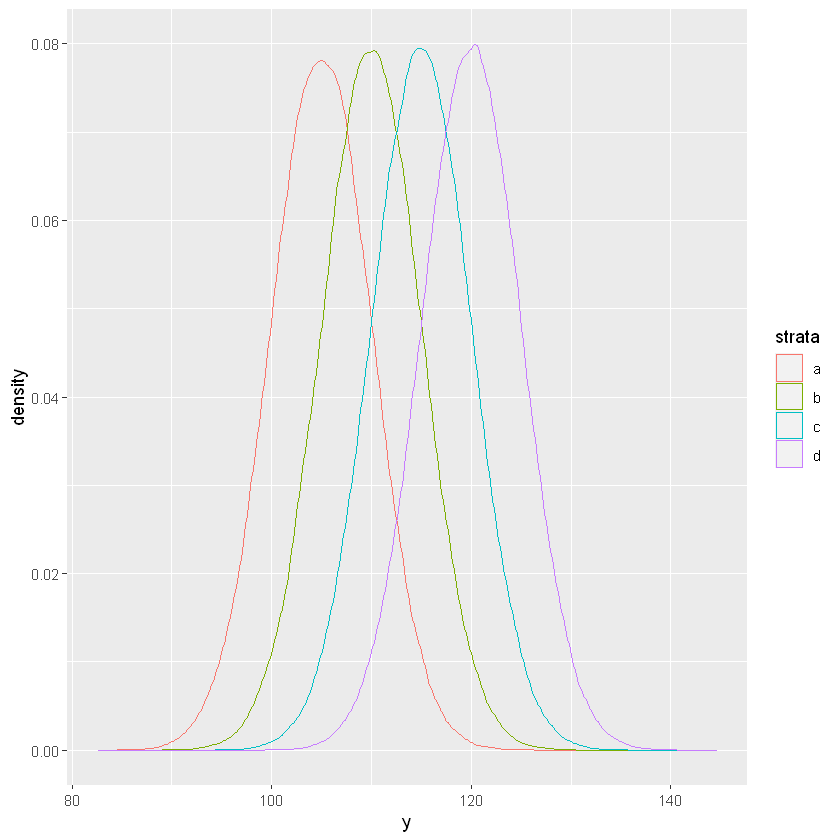

In [8]:
strata_densities<-ggplot(population, aes(x=y,color=strata)) + geom_density();strata_densities

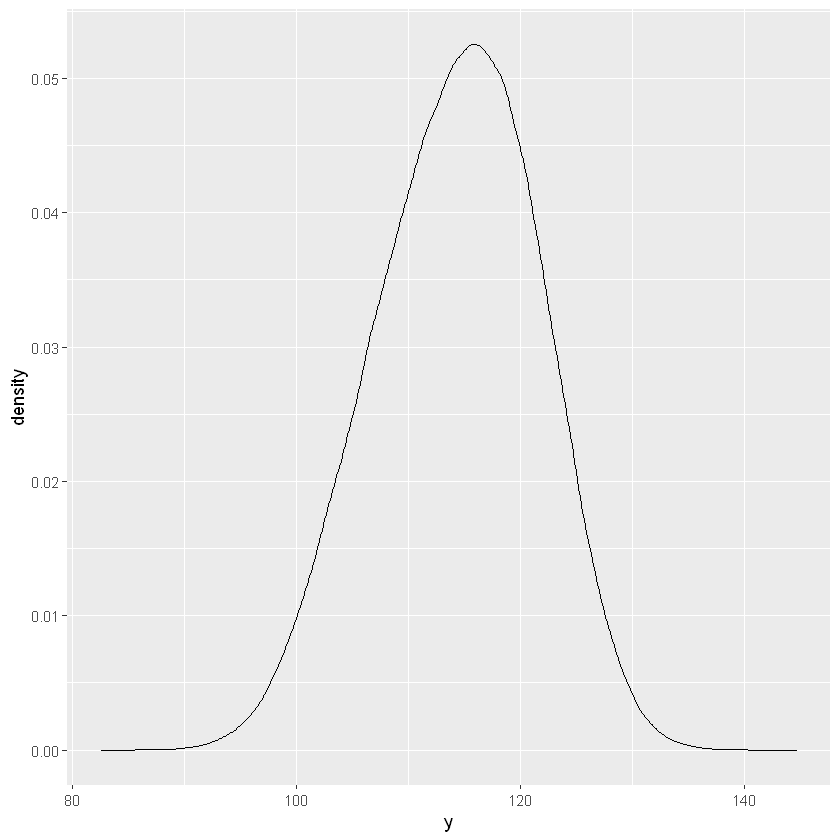

In [9]:
cluster_densities<-ggplot(population, aes(x=y,color=cluster)) + geom_density();cluster_densities

In [10]:
# Explicitly define N
N<-population_size;N

[1] 1e+06

In [11]:
# Set the confidence level
confidence_level = 0.95;confidence_level

[1] 0.95

In [12]:
# Calculate alpha
alpha<-1-confidence_level;alpha

[1] 0.05

In [13]:
# Calculate quantile using normal distribution
z_alpha<-qnorm(1-alpha/2);round(z_alpha,3)

[1] 1.96

In [14]:
# Set the desired margin of error
margin_error=0.5;margin_error

[1] 0.5

In [15]:
# Calculate n using margin of error assuming SRS(with replacement)
n_wr<-ceiling((z_alpha/margin_error)^2*y_VAR);n_wr

[1] 819

In [16]:
# Calculate n using margin of error for SRSWOR margin_error=z*standard_error=z*sqrt(y_bar_var)=z*sqrt((N-n)/N*y_VAR/n) -> solve for n
n<-ceiling(N/(N*margin_error^2/(z_alpha^2*y_VAR)+1));n
t_alpha_n<-qt(c(alpha/2, 1-alpha/2), df=n-1)[2]
n<-ceiling(N/(N*margin_error^2/(t_alpha_n^2*y_VAR)+1));n

[1] 819

[1] 821

In [17]:
# Calculate sampling fraction
f<-n/N; f

[1] 0.000821

In [18]:
# Calculate predicted margin of error based on sample size and sample fraction
predicted_margin_error<-round(qnorm(1-alpha/2)*sqrt((1-f)*y_VAR/n),2);predicted_margin_error

[1] 0.5

In [19]:
# SRSWOR
sample<-srswor(n = n,N = N)

In [20]:
# Make sure that the sample size is the same as n
sum(sample)==n

[1] TRUE

In [21]:
# Select the sampled units into a new data frame
sampled_frame<-population[sample==1,]

In [22]:
head(sampled_frame)

,cluster,strata,y,c1,c2,c3,c4,sa,sb,sc,sd
,<dbl>,<fct>,<dbl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>
697,3,a,110.0274,FALSE,FALSE,TRUE,FALSE,TRUE,FALSE,FALSE,FALSE
2771,1,a,108.1747,TRUE,FALSE,FALSE,FALSE,TRUE,FALSE,FALSE,FALSE
3344,1,a,107.1621,TRUE,FALSE,FALSE,FALSE,TRUE,FALSE,FALSE,FALSE
4739,1,a,103.2995,TRUE,FALSE,FALSE,FALSE,TRUE,FALSE,FALSE,FALSE
12456,4,a,107.2265,FALSE,FALSE,FALSE,TRUE,TRUE,FALSE,FALSE,FALSE
14027,1,a,115.0193,TRUE,FALSE,FALSE,FALSE,TRUE,FALSE,FALSE,FALSE


**Estimating the population mean**

In [23]:
# Sample mean
y_bar_hat<-mean(sampled_frame$y);round(y_bar_hat,3)

[1] 114.793

In [24]:
# Sample variance
var_y_sample<-var(sampled_frame$y);round(var_y_sample,3)

[1] 54.048

In [25]:
# Sample SD
sd_sample<-sqrt(var_y_sample);round(sd_sample,3)

[1] 7.352

In [26]:
# Standard error
se_sample<-sd_sample*sqrt((1-n/N)/n);round(se_sample,3)

[1] 0.256

In [27]:
# Resulting margin of error using z
resulting_margin<-qnorm(1-alpha/2)*se_sample;round(resulting_margin,3)

[1] 0.503

In [28]:
# Resulting margin of error using student's t
t_alpha_n<-qt(c(alpha/2, 1-alpha/2), df=n-1)[2]
resulting_margin<-t_alpha_n*se_sample;round(resulting_margin,3)

[1] 0.503

In [29]:
# Sample mean
round(y_bar_hat,2)

[1] 114.79

In [30]:
# 1-alpha CI for the mean using data and z
round(c(y_bar_hat-z_alpha*se_sample,y_bar_hat+z_alpha*se_sample),2)

[1] 114.29 115.30

In [31]:
# 1-alpha CI for the mean CI using data and t
round(c(y_bar_hat-t_alpha_n*se_sample,y_bar_hat+t_alpha_n*se_sample),2)

[1] 114.29 115.30

**Estimating the population total**

In [32]:
Y_T<-sum(population$y);round(Y_T,2)

[1] 114243672

In [33]:
y_T_hat<-y_bar_hat*N;round(y_T_hat,2)

[1] 114792998

In [34]:
# Estimation error percentage
round((y_T_hat/Y_T-1)*100,2)

[1] 0.48

In [35]:
var_y_T_hat<-(1-f)*N^2*var_y_sample;round(var_y_T_hat,2)

[1] 5.400342e+13

In [36]:
serr_y_T_hat<-sqrt(var_y_T_hat/n);round(serr_y_T_hat,2)

[1] 256471.5

In [37]:
# Estimated population total
round(y_T_hat,2)

[1] 114792998

In [38]:
# 1-alpha level Confidence interval for the estimated total
ci_total<-c(y_T_hat-t_alpha_n*N*sqrt(var_y_sample*(1-f)/n),y_T_hat+t_alpha_n*N*sqrt(var_y_sample*(1-f)/n));round(ci_total,2)

[1] 114289580 115296416

**Estimating a proportion**

In [39]:
# True stratum a proportion
p<-sum(population$sd)/N;round(p,4)

[1] 0.35

In [40]:
# Estimate stratum a proportion
p_hat<-sum(sampled_frame$sd)/length(sampled_frame$sd);round(p_hat,4)

[1] 0.3618

In [41]:
# Calculated variance of sample proportion
var_p_hat<-n*p_hat*(1-p_hat)/(n-1);round(var_p_hat,4)

[1] 0.2312

In [42]:
# Actual variance of sample proportion
var_p<-var(sampled_frame$sd);round(var_p,4)

[1] 0.2312

In [43]:
# Standard error of sample proportion
se_p_hat<-sqrt((1-f)*var_p_hat/n);round(se_p_hat,4)

[1] 0.0168

In [44]:
ci_proportion<-c(p_hat-t_alpha_n*se_p_hat,p_hat+t_alpha_n*se_p_hat);round(ci_proportion,4)

[1] 0.3288 0.3947